In [1]:
# library declaration
import os
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
path = 'D:\Personal Project\personal_project\pokemon\data'

os.chdir(path)
os.listdir(path)

['combats.csv', 'pokemon.csv', 'poke_type_chart.csv']

In [3]:
# read_data

pokemon = pd.read_csv('pokemon.csv')
combat = pd.read_csv('combats.csv')

display(pokemon)
display(combat)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151
...,...,...,...
49995,707,126,707
49996,589,664,589
49997,303,368,368
49998,109,89,109


In [5]:
# check null
def find_missing_percent(data):
    miss_df = pd.DataFrame({'column_name': [], 'total_missing_value': [], 'percent': []})
    
    for col in data.columns:
        missinginfo = {'column_name': col,
                       'total_missing_value': data[col].isna().sum()}
        miss_df = miss_df.append(missinginfo, ignore_index = True)
    miss_df = miss_df[miss_df['total_missing_value'] > 0]
    #miss_df['total_missing_value'] = np.round((miss_df['total_missing_value']))
    miss_df['percent'] = np.round((miss_df['total_missing_value']/data.shape[0])*100, decimals = 2)
        
    return miss_df

miss_pokemon = find_missing_percent(pokemon)
miss_combat = find_missing_percent(combat)

print('null of dataframe pokemon')
display(miss_pokemon)
print('\nnull of dataframe combat')
display(miss_combat)

null of dataframe pokemon


,column_name,total_missing_value,percent
1,Name,1.0,0.12
3,Type 2,386.0,48.25



null of dataframe combat


,column_name,total_missing_value,percent


In [6]:
# fill in the missing data of the column name
idx = pokemon[pokemon['Name'].isna()].index[0]
display(pokemon.loc[idx - 2: idx + 2],)

# check pokemon https://www.pokemon.com/us/pokedex/primeape
pokemon.loc[62, 'Name'] = 'Primeape'
display(pokemon.loc[idx - 2: idx + 2],)

remiss_pokemon = find_missing_percent(pokemon)
remiss_pokemon

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
60,61,Golduck,Water,NaN,80,82,78,95,80,85,1,False
61,62,Mankey,Fighting,NaN,40,80,35,35,45,70,1,False
62,63,NaN,Fighting,NaN,65,105,60,60,70,95,1,False
63,64,Growlithe,Fire,NaN,55,70,45,70,50,60,1,False
64,65,Arcanine,Fire,NaN,90,110,80,100,80,95,1,False


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
60,61,Golduck,Water,NaN,80,82,78,95,80,85,1,False
61,62,Mankey,Fighting,NaN,40,80,35,35,45,70,1,False
62,63,Primeape,Fighting,NaN,65,105,60,60,70,95,1,False
63,64,Growlithe,Fire,NaN,55,70,45,70,50,60,1,False
64,65,Arcanine,Fire,NaN,90,110,80,100,80,95,1,False


,column_name,total_missing_value,percent
3,Type 2,386.0,48.25


In [7]:
# fill in the missing data of the column type 2

# can have a pet with only 1 attribute so we'll make sure it doesn't exist
pokemon['Type 2'].fillna("doesn't exist", inplace=True)

remiss_pokemon = find_missing_percent(pokemon)
remiss_pokemon

,column_name,total_missing_value,percent


In [8]:
# create and select the necessary features

display(combat.groupby('First_pokemon')[['Second_pokemon']].count().head())
display(combat.groupby('Second_pokemon')[['First_pokemon']].count().head())

,Second_pokemon
First_pokemon,
1,70
2,55
3,68
4,62
5,50


,First_pokemon
Second_pokemon,
1,63
2,66
3,64
4,63
5,62


In [9]:
# counting turns to battle
total_fights = (combat.groupby('First_pokemon').count() + combat.groupby('Second_pokemon').count())
total_fights.head()

,First_pokemon,Second_pokemon,Winner
First_pokemon,,,
1,NaN,NaN,133
2,NaN,NaN,121
3,NaN,NaN,132
4,NaN,NaN,125
5,NaN,NaN,112


In [10]:
win_count = combat['Winner'].value_counts()
win_count

163    152
438    136
154    136
428    134
314    133
      ... 
577      5
237      4
639      4
290      3
190      3
Name: Winner, Length: 783, dtype: int64

In [11]:
win_stats_df = pd.DataFrame(columns = ['pokedex', 'total_fights', 'total_wins', 'win_percent'], )

win_stats_df['pokedex'] = total_fights.index
#win_stats_df.set_index('pokedex', inplace=True)
win_stats_df['total_fights'] = total_fights['Winner'].values
win_stats_df['total_wins'] = win_stats_df['pokedex'].apply(lambda idx: win_count[idx] if idx in win_count.keys() else 0)
win_stats_df['win_percent'] = np.round(win_stats_df['total_wins']/win_stats_df['total_fights'], decimals = 3)

In [12]:
win_stats_df

,pokedex,total_fights,total_wins,win_percent
0,1,133,37,0.278
1,2,121,46,0.380
2,3,132,89,0.674
3,4,125,70,0.560
4,5,112,55,0.491
...,...,...,...,...
779,796,105,39,0.371
780,797,131,116,0.885
781,798,119,60,0.504
782,799,144,89,0.618


In [13]:
# gather important features

pokemon_noise = pokemon[['#','Type 1','Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary']]

In [14]:
data = pd.merge(pokemon_noise, win_stats_df, left_on = '#', right_on = 'pokedex')
data = data[['pokedex','Type 1','Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary', 'win_percent']]

In [15]:
data

,pokedex,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,win_percent
0,1,Grass,Poison,45,49,49,65,65,45,1,False,0.278
1,2,Grass,Poison,60,62,63,80,80,60,1,False,0.380
2,3,Grass,Poison,80,82,83,100,100,80,1,False,0.674
3,4,Grass,Poison,80,100,123,122,120,80,1,False,0.560
4,5,Fire,doesn't exist,39,52,43,60,50,65,1,False,0.491
...,...,...,...,...,...,...,...,...,...,...,...,...
779,796,Rock,Fairy,50,100,150,100,150,50,6,True,0.371
780,797,Rock,Fairy,50,160,110,160,110,110,6,True,0.885
781,798,Psychic,Ghost,80,110,60,150,130,70,6,True,0.504
782,799,Psychic,Dark,80,160,60,170,130,80,6,True,0.618


In [16]:
result = data[data['Legendary'] == True]
table = pd.crosstab(result['Type 1'], result['Type 2'])
display(table)

Type 2,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Ground,Ice,Psychic,Steel,Water,doesn't exist
Type 1,,,,,,,,,,,,,,
Dark,0,0,0,0,0,0,1,0,0,0,0,0,0,1
Dragon,0,0,1,0,0,1,2,0,1,3,3,0,0,0
Electric,0,0,0,0,0,0,3,0,0,0,0,0,0,1
Fairy,0,0,0,0,0,0,0,0,0,0,0,0,0,1
Fire,0,0,0,0,0,0,2,0,0,0,0,1,1,1
Flying,0,0,0,0,0,0,0,0,0,0,0,0,0,2
Ghost,0,2,0,0,0,0,0,0,0,0,0,0,0,0
Grass,0,0,0,0,1,0,1,0,0,0,0,0,0,1
Ground,0,0,0,0,0,1,2,0,0,0,0,0,0,1


In [17]:
data.corr().style.background_gradient(cmap = 'Reds')

,pokedex,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,win_percent
pokedex,1.000000,0.103511,0.105296,0.095125,0.089596,0.081203,0.009309,0.983282,0.154566,0.061251
HP,0.103511,1.000000,0.420464,0.248069,0.366261,0.385570,0.183813,0.062361,0.280315,0.261556
Attack,0.105296,0.420464,1.000000,0.442344,0.398339,0.265884,0.385933,0.052824,0.348178,0.502829
Defense,0.095125,0.248069,0.442344,1.000000,0.221042,0.508399,0.011475,0.042117,0.242051,0.114598
Sp. Atk,0.089596,0.366261,0.398339,0.221042,1.000000,0.503077,0.473344,0.036614,0.447989,0.481466
Sp. Def,0.081203,0.385570,0.265884,0.508399,0.503077,1.000000,0.254372,0.023787,0.357186,0.302407
Speed,0.009309,0.183813,0.385933,0.011475,0.473344,0.254372,1.000000,-0.026175,0.323255,0.938044
Generation,0.983282,0.062361,0.052824,0.042117,0.036614,0.023787,-0.026175,1.000000,0.079847,0.023029
Legendary,0.154566,0.280315,0.348178,0.242051,0.447989,0.357186,0.323255,0.079847,1.000000,0.324951
win_percent,0.061251,0.261556,0.502829,0.114598,0.481466,0.302407,0.938044,0.023029,0.324951,1.000000


In [18]:
data

,pokedex,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,win_percent
0,1,Grass,Poison,45,49,49,65,65,45,1,False,0.278
1,2,Grass,Poison,60,62,63,80,80,60,1,False,0.380
2,3,Grass,Poison,80,82,83,100,100,80,1,False,0.674
3,4,Grass,Poison,80,100,123,122,120,80,1,False,0.560
4,5,Fire,doesn't exist,39,52,43,60,50,65,1,False,0.491
...,...,...,...,...,...,...,...,...,...,...,...,...
779,796,Rock,Fairy,50,100,150,100,150,50,6,True,0.371
780,797,Rock,Fairy,50,160,110,160,110,110,6,True,0.885
781,798,Psychic,Ghost,80,110,60,150,130,70,6,True,0.504
782,799,Psychic,Dark,80,160,60,170,130,80,6,True,0.618


In [19]:
col = 'HP'
arr = np.array(data[col])
arr

array([ 45,  60,  80,  80,  39,  58,  78,  78,  78,  44,  59,  79,  45,
        50,  60,  40,  45,  65,  65,  40,  63,  83,  83,  30,  55,  40,
        65,  35,  60,  35,  60,  75,  55,  70,  90,  46,  61,  81,  70,
        95,  38,  73, 115,  40,  75,  45,  60,  75,  35,  60,  60,  70,
        10,  35,  40,  65,  50,  80,  40,  65,  55,  90,  65,  90,  25,
        40,  55,  55,  70,  80,  90,  50,  65,  40,  80,  40,  55,  80,
        50,  65,  90,  95,  95,  25,  52,  35,  60,  65,  90,  80, 105,
        30,  50,  30,  45,  60,  60,  35,  60,  85,  30,  55,  40,  60,
        60,  95,  50,  60,  50,  50,  90,  40,  65,  80, 105, 250,  65,
       105, 105,  30,  55,  45,  80,  30,  60,  40,  70,  65,  65,  65,
        65,  65,  75,  20,  95,  95, 130,  55, 130,  65,  65,  65,  35,
        70,  30,  60,  80,  80, 160,  90,  90,  90,  41,  61,  91, 106,
       106, 106, 100,  45,  60,  80,  39,  58,  78,  50,  65,  85,  35,
        85,  60, 100,  40,  55,  40,  85,  75, 125,  20,  50,  9

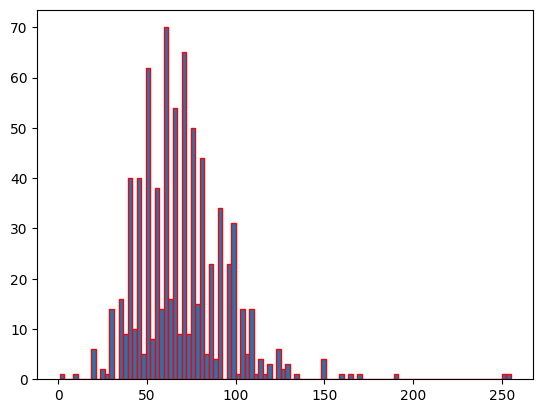

In [20]:
hist = plt.hist(arr, bins = 100, ec = 'r')

In [25]:
# noise data handling

minV, maxV = data['HP'].min(), data['HP'].max()
q1, q2, q3 = np.quantile(data['HP'],0.25), np.quantile(data['HP'],0.5), np.quantile(data['HP'],0.75)
low25 = q1 - minV
up75 = maxV - q3
bins = [minV - 1, q1, q2, q3, maxV + 1]
bins

[0, 50.0, 65.0, 80.0, 256]

In [26]:
col = 'HP'
data[col + '_q_Adpt'] = pd.cut(arr, bins).astype(np.object)

In [29]:
data[['HP','win_percent', col + '_q_Adpt']]

,HP,win_percent,HP_q_Adpt
0,45,0.278,"(0.0, 50.0]"
1,60,0.380,"(50.0, 65.0]"
2,80,0.674,"(65.0, 80.0]"
3,80,0.560,"(65.0, 80.0]"
4,39,0.491,"(0.0, 50.0]"
...,...,...,...
779,50,0.371,"(0.0, 50.0]"
780,50,0.885,"(0.0, 50.0]"
781,80,0.504,"(65.0, 80.0]"
782,80,0.618,"(65.0, 80.0]"


In [31]:
HP_mean_dict = data.groupby('HP_q_Adpt')['HP'].mean()
HP_mean_dict

HP_q_Adpt
(0.0, 50.0]       42.072816
(50.0, 65.0]      60.025907
(65.0, 80.0]      74.060914
(80.0, 256.0]    102.739362
Name: HP, dtype: float64

In [34]:
data['HP_adj'] = data['HP_q_Adpt'].map(HP_mean_dict)
data.head()

,pokedex,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,win_percent,HP_q_Adpt,HP_adj
0,1,Grass,Poison,45,49,49,65,65,45,1,False,0.278,"(0.0, 50.0]",42.072816
1,2,Grass,Poison,60,62,63,80,80,60,1,False,0.380,"(50.0, 65.0]",60.025907
2,3,Grass,Poison,80,82,83,100,100,80,1,False,0.674,"(65.0, 80.0]",74.060914
3,4,Grass,Poison,80,100,123,122,120,80,1,False,0.560,"(65.0, 80.0]",74.060914
4,5,Fire,doesn't exist,39,52,43,60,50,65,1,False,0.491,"(0.0, 50.0]",42.072816


In [37]:
data_HP = data[['HP', 'win_percent', 'HP_q_Adpt', 'HP_adj']]
data_HP

,HP,win_percent,HP_q_Adpt,HP_adj
0,45,0.278,"(0.0, 50.0]",42.072816
1,60,0.380,"(50.0, 65.0]",60.025907
2,80,0.674,"(65.0, 80.0]",74.060914
3,80,0.560,"(65.0, 80.0]",74.060914
4,39,0.491,"(0.0, 50.0]",42.072816
...,...,...,...,...
779,50,0.371,"(0.0, 50.0]",42.072816
780,50,0.885,"(0.0, 50.0]",42.072816
781,80,0.504,"(65.0, 80.0]",74.060914
782,80,0.618,"(65.0, 80.0]",74.060914


In [39]:
statsDF = data_HP.corr()
statsDF.style.background_gradient(cmap = 'coolwarm')

,HP,win_percent,HP_adj
HP,1.000000,0.261556,0.872050
win_percent,0.261556,1.000000,0.298543
HP_adj,0.872050,0.298543,1.000000


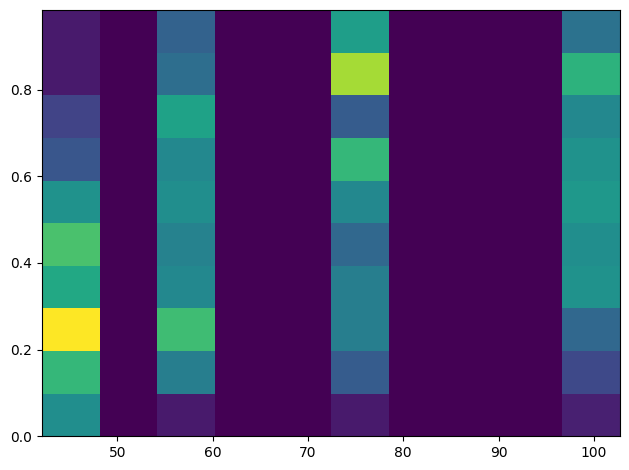

In [41]:
fig , ax = plt.subplots(tight_layout = True)
hist = ax.hist2d(data_HP['HP_adj'], data_HP['win_percent'])

In [45]:
for bins in range(3, 15):
    bin_group = col + '_fixW_' + str(bins)
    data_HP[bin_group] = pd.qcut(arr, q = bins).astype(np.object)
    HP_mean_dict = data_HP.groupby(bin_group)['HP'].mean()
    bin_feature = 'HP' + f'_{str(bins)}'
    data_HP[bin_feature] = data_HP[bin_group].map(HP_mean_dict)
    
data_HP.head()

,HP,win_percent,HP_q_Adpt,HP_adj,HP_fixW_3,HP_3,HP_fixW_4,HP_4,HP_fixW_5,HP_5,...,HP_fixW_10,HP_10,HP_fixW_11,HP_11,HP_fixW_12,HP_12,HP_fixW_13,HP_13,HP_fixW_14,HP_14
0,45,0.278,"(0.0, 50.0]",42.072816,"(0.999, 59.0]",45.134831,"(0.999, 50.0]",42.072816,"(0.999, 50.0]",42.072816,...,"(40.0, 50.0]",47.504202,"(40.0, 49.0]",44.879310,"(40.0, 45.0]",44.470588,"(40.0, 45.0]",44.470588,"(40.0, 45.0]",44.470588
1,60,0.380,"(50.0, 65.0]",60.025907,"(59.0, 75.0]",66.883019,"(50.0, 65.0]",60.025907,"(50.0, 60.0]",57.826772,...,"(55.0, 60.0]",59.654321,"(54.0, 60.0]",58.194915,"(59.0, 60.0]",60.000000,"(55.0, 60.0]",59.654321,"(55.0, 60.0]",59.654321
2,80,0.674,"(65.0, 80.0]",74.060914,"(75.0, 255.0]",96.753968,"(65.0, 80.0]",74.060914,"(70.0, 86.8]",78.348387,...,"(78.1, 86.8]",81.730769,"(75.0, 80.0]",79.171875,"(75.0, 80.0]",79.171875,"(78.0, 84.0]",80.290909,"(75.0, 80.0]",79.171875
3,80,0.560,"(65.0, 80.0]",74.060914,"(75.0, 255.0]",96.753968,"(65.0, 80.0]",74.060914,"(70.0, 86.8]",78.348387,...,"(78.1, 86.8]",81.730769,"(75.0, 80.0]",79.171875,"(75.0, 80.0]",79.171875,"(78.0, 84.0]",80.290909,"(75.0, 80.0]",79.171875
4,39,0.491,"(0.0, 50.0]",42.072816,"(0.999, 59.0]",45.134831,"(0.999, 50.0]",42.072816,"(0.999, 50.0]",42.072816,...,"(0.999, 40.0]",34.643678,"(0.999, 40.0]",34.643678,"(0.999, 40.0]",34.643678,"(0.999, 40.0]",34.643678,"(0.999, 40.0]",34.643678


In [52]:
statsDF = data_HP.corr()
statsDF.style.background_gradient(cmap = 'Blues')

,HP,win_percent,HP_adj,HP_3,HP_4,HP_5,HP_6,HP_7,HP_8,HP_9,HP_10,HP_11,HP_12,HP_13,HP_14
HP,1.000000,0.261556,0.872050,0.829453,0.872050,0.888005,0.904684,0.917497,0.920433,0.932583,0.933641,0.934959,0.935526,0.937878,0.943175
win_percent,0.261556,1.000000,0.298543,0.333351,0.298543,0.308193,0.315030,0.314726,0.309176,0.300051,0.296706,0.300512,0.301743,0.299945,0.298187
HP_adj,0.872050,0.298543,1.000000,0.907867,1.000000,0.961524,0.937739,0.938820,0.947435,0.923991,0.927939,0.931689,0.932150,0.928446,0.924590
HP_3,0.829453,0.333351,0.907867,1.000000,0.907867,0.906004,0.916843,0.890884,0.884864,0.889414,0.884133,0.880537,0.886616,0.880907,0.878170
HP_4,0.872050,0.298543,1.000000,0.907867,1.000000,0.961524,0.937739,0.938820,0.947435,0.923991,0.927939,0.931689,0.932150,0.928446,0.924590
HP_5,0.888005,0.308193,0.961524,0.906004,0.961524,1.000000,0.952786,0.952445,0.953326,0.949118,0.951120,0.943517,0.943828,0.942217,0.940042
HP_6,0.904684,0.315030,0.937739,0.916843,0.937739,0.952786,1.000000,0.968698,0.963916,0.951851,0.953011,0.964232,0.967032,0.962061,0.954071
HP_7,0.917497,0.314726,0.938820,0.890884,0.938820,0.952445,0.968698,1.000000,0.989105,0.964466,0.965176,0.972809,0.974311,0.973051,0.972775
HP_8,0.920433,0.309176,0.947435,0.884864,0.947435,0.953326,0.963916,0.989105,1.000000,0.969704,0.971113,0.977237,0.977324,0.975753,0.974795
HP_9,0.932583,0.300051,0.923991,0.889414,0.923991,0.949118,0.951851,0.964466,0.969704,1.000000,0.996376,0.992418,0.993653,0.989812,0.984935


In [57]:
best_hp_feature = statsDF.loc['win_percent'].sort_values(ascending = False).keys()[1]
best_hp_feature

'HP_3'

In [58]:
data['HP'] = data_HP[best_hp_feature]

In [62]:
dataset = data[['HP', 'Attack', 'Sp. Atk', 'Sp. Def', 'Speed', 'Legendary', 'win_percent']]
dataset

,HP,Attack,Sp. Atk,Sp. Def,Speed,Legendary,win_percent
0,45.134831,49,65,65,45,False,0.278
1,66.883019,62,80,80,60,False,0.380
2,96.753968,82,100,100,80,False,0.674
3,96.753968,100,122,120,80,False,0.560
4,45.134831,52,60,50,65,False,0.491
...,...,...,...,...,...,...,...
779,45.134831,100,100,150,50,True,0.371
780,45.134831,160,160,110,110,True,0.885
781,96.753968,110,150,130,70,True,0.504
782,96.753968,160,170,130,80,True,0.618


In [63]:
trainCols = ["HP", "Attack",  "Sp. Atk", "Sp. Def", "Speed",  "Legendary"]
target = 'win_percent'

In [64]:
X = dataset[trainCols].values
y = dataset[target].values

print(X.shape, y.shape)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(784, 6) (784,)
(627, 6) (627,)
(157, 6) (157,)


In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

regressior = LinearRegression()
regressior.fit(X_train, y_train)
y_pred = regressior.predict(X_test)

print(f"MAE : {mean_absolute_error(y_test, y_pred)}")
print(f"Acc : {regressior.score(X_test, y_test)}")

MAE : 0.06188081164293927
Acc : 0.8972024236470244


In [66]:
from sklearn.tree import DecisionTreeRegressor
regressior = DecisionTreeRegressor(random_state = 0)
regressior.fit(X_train, y_train)
y_pred = regressior.predict(X_test)

print(f"MAE : {mean_absolute_error(y_test, y_pred)}")
print(f"Acc : {regressior.score(X_test, y_test)}")

MAE : 0.055892993630573234
Acc : 0.913986992749282


In [67]:
from sklearn.ensemble import RandomForestRegressor
regressior = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressior.fit(X_train, y_train)
y_pred = regressior.predict(X_test)

print(f"MAE : {mean_absolute_error(y_test, y_pred)}")
print(f"Acc : {regressior.score(X_test, y_test)}")

MAE : 0.0487995112223233
Acc : 0.929941894341776
